In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

X,y = mnist.data,mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

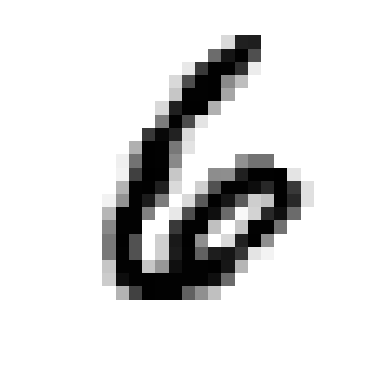

'6'

In [16]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
some_digit = X[13]
plot_digit(some_digit)
plt.show()
y[13]

In [18]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

# training a binary classifier for identifying 5
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
prediction = sgd_clf.predict([some_digit])

score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(score)

[0.95035 0.96035 0.9604 ]
